## Predicting Booking Hotel Cancellation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Exploratory Data Analysis (EDA)
#### 1) Top 10 countries of origin of Hotel visitors (Guests)
#### 2) Which month is the most busiest with bookings in the Hotel
#### 3) How many bookings were cancelled
#### 4) Which month has highest number of cancellations
#### 5) How many bookings were cancelled every month by Hotel Type
#### 6) Relationship between ADR and Arrival month by booking cancellation status
#### 7) Total number of bookings for each hotel
#### 8) Total number of bookings by Market Segment
#### 9) Total number of bookings by Customer type
#### 10) Arrival_date_year vs lead_time with booking cancellation status.
#### 11) Total Number of Special requests
#### 12) Relationship between total special requests and cancellations
#### 13) Total nights spent at Hotels by Market Segment and Hotel Type
#### 14) How does the Price Per Night (ADR) Vary Over the Year by Hotel Type
#### 15) What is the effect of repeated guest on Cancellations
#### 16) Total Number of bookings by deposit type
#### 17) What is the Effect of deposit type on Cancellations
#### 18) What is the Effect of Meal type on Cancellations
#### 19) What is the Effect of required_car_parking_spaces on Cancellations
#### 20) What is the Effect of booking changes (Modifications) on Cancellations

## EDA : Data Visualisation
### 1. Top 10 countries of origin of Hotel visitors (Guests

In [5]:
df['country'].value_counts(normalize = True)[:10]

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

Text(0, 0.5, 'Reservation Count')

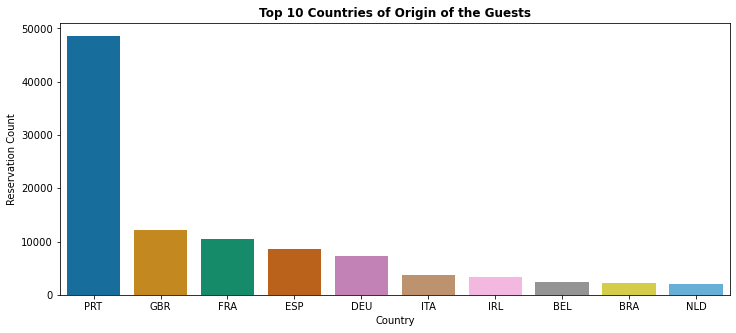

In [6]:
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

#### 1.The Above graph depicts information about the countries of origin of guests where the bookings were created.
#### 2.About 40% of all bookings are created from Portugal followed by Great Britain(10%) & France(8%)

### 2. Which Month is the Most Occupied (Busiest) with Bookings at the Hotel

In [7]:
df['arrival_date_month'].value_counts(normalize = True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

Text(0, 0.5, 'Reservation Count')

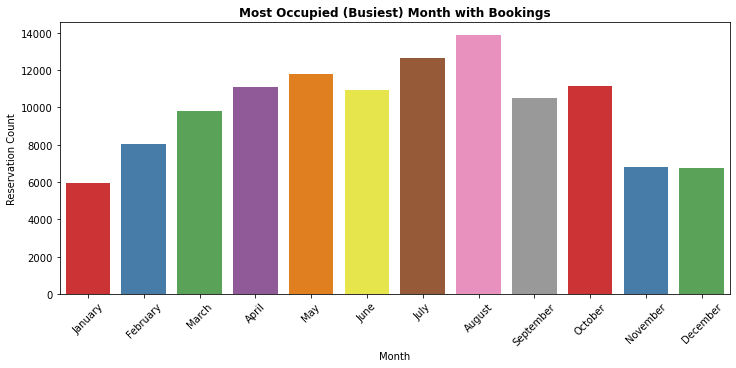

In [8]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.countplot(x='arrival_date_month', data = df,palette= 'Set1')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')

#### 1. The above graph depicts the number of bookings created for each month.
#### 2. According to the graph, August is the most occupied (busiest) month with  and January is the most unoccupied month.

### 3. How many Bookings were Cancelled at the Hotel


In [9]:
df['is_canceled'].value_counts(normalize = True)


0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

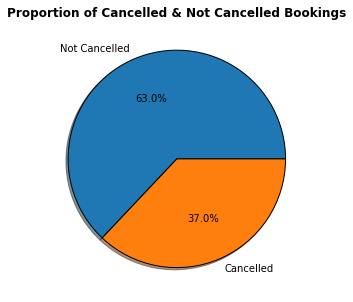

In [10]:
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

#### 1. The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.
##### 2. According to the pie chart, 63% bookings were not cancelled and 37% of the bookings were cancelled at the Hotel

### 4. Which Month has Highest Number of Cancellations By Hotel Type


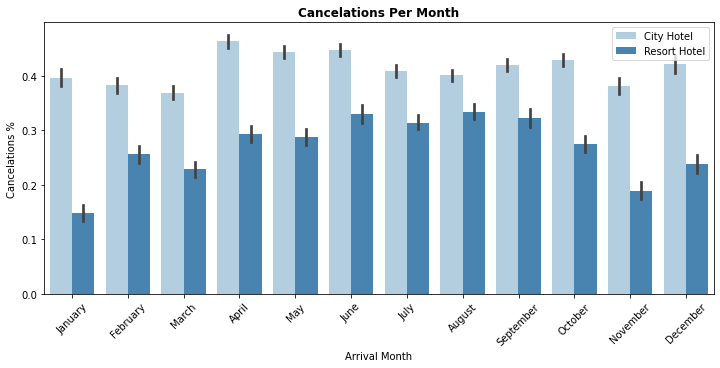

In [11]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'Blues')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

#### 1. For the City hotel the number of cancelations per month is around 40 % throughout the year.
#### 2. For the Resort hotel, the cancellations are highest in the summer (June,July, August) and lowest during the winter    
####    (November,December,January). In short, the possibility of cancellation for resort hotels in winter is very low.

### 5. How many Bookings were Cancelled by Hotel Type


In [12]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

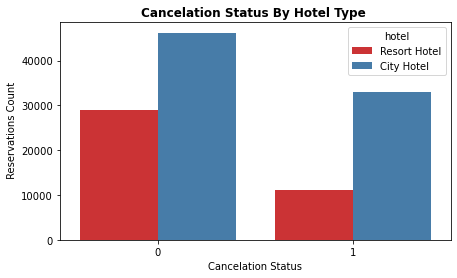

In [13]:
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

#### 1.For the Resort Hotel, total of 25.14% Bookings were cancelled
#### 2.For the City Hotel, total of 74.85% Bookings were cancelled

### 6. Relationship between Average Daily Rate(ADR) and Arrival Month by Booking cancellation status

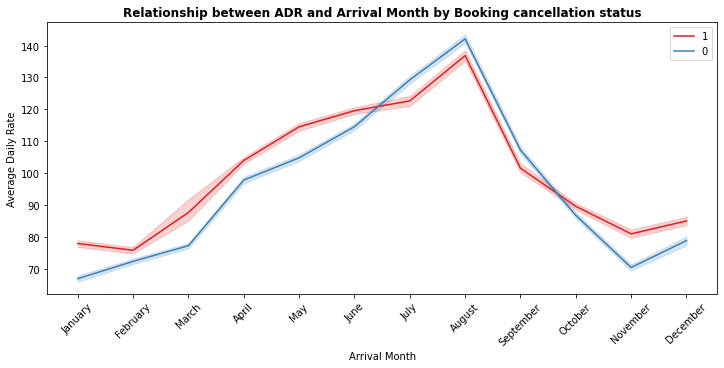

In [14]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

#### 1.The above line chart depicts arrival month "August" is the most occupied (Busiest) month of bookings.
#### 2.The highest Arrival Daily Rate (ADR) has been occurred in same August month.
#### 3.Due to Highest ADR in August may be it could be one of the reasons for more canceled bookings in August.

### 7. Total Number of Bookings for Each Hotel

In [15]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

Text(0, 0.5, 'Reservation Count')

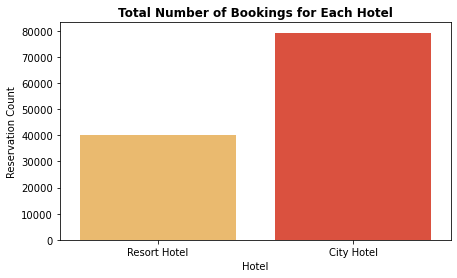

In [16]:
plt.figure(figsize = (7,4))
sns.countplot(x='hotel', data = df, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

#### 1.The above graph depicts that approximately 34% of the reservations were booked for Resort hotel and 66% were booked for City Hotel.

### 8. Total Number of Bookings by Market Segment

In [17]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Reservation Count')

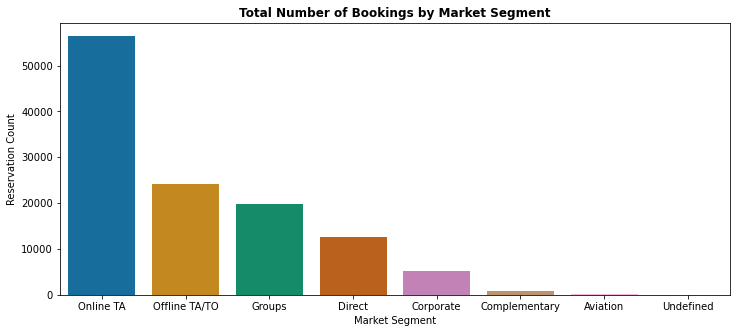

In [18]:
sns.countplot(df['market_segment'], palette='colorblind',order=pd.value_counts(df['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

#### 1.The above graph depicts that 47.3% of bookings are made via Online Travel Agents
#### 2.Around 20% of bookings are made via Offline Travel Agents.
#### 3.Less than 20% of bookings made directly without any agent

### 9. Total Number of Bookings by Customer Type

In [19]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0, 0.5, 'Reservation Count')

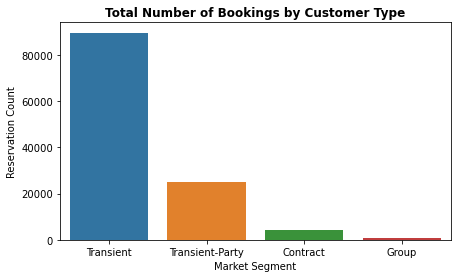

In [20]:
plt.figure(figsize= (7,4))
sns.countplot(df['customer_type'],order=pd.value_counts(df['customer_type']).index)
plt.title('Total Number of Bookings by Customer Type',weight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

#### 1.The above graph depicts that 75% of bookings were Transient Bookings, 21% bookings were Transient_Party bookings.
#### 2.Around 3% bookings were contract bookings.


### 10. Arrival Date Year vs Lead Time By Booking Cancellation Status

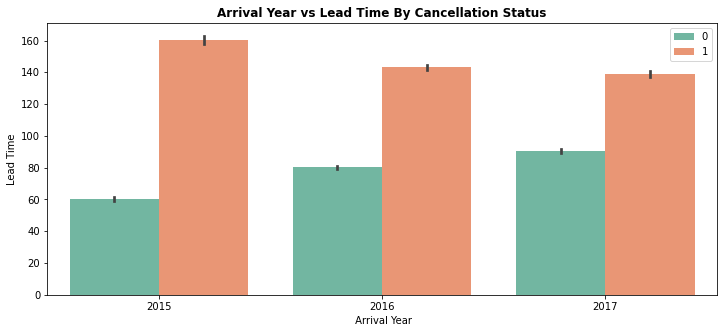

In [21]:
sns.barplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set2")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

#### 1.For all the 3 years, bookings with lead time less than 100 days has less chances of getting cancelled
#### 2.For all the 3 years, bookings with lead time more than 100 days has more chances of getting cancelled

### 11. Exploring Number of Special Requests

In [22]:
df['total_of_special_requests'].value_counts(normalize = True)


0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Count')

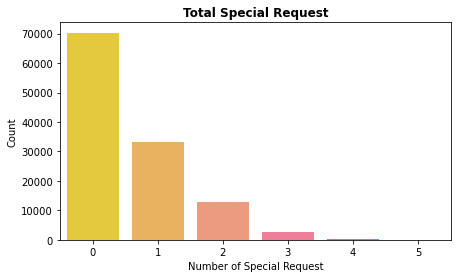

In [23]:
plt.figure(figsize = (7,4))
sns.countplot(x='total_of_special_requests', data=df, palette = 'spring_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

#### 1.From the above graph we can depict that around 58.8% bookings do not have any special requests from the guests

### 12. Relationship between Special Requests and Cancellations


In [24]:
pd.crosstab(df['is_canceled'],df['total_of_special_requests'],normalize= True)

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,0.307915,0.217003,0.084622,0.017179,0.002546,0.000318
1,0.281062,0.061295,0.024005,0.003736,0.000302,0.000017


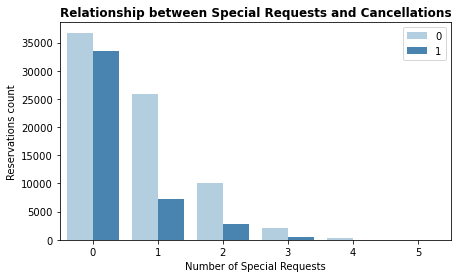

In [25]:
plt.figure(figsize = (7,4))
sns.countplot(x = "total_of_special_requests", hue = "is_canceled",data=df,palette= 'Blues')
plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

#### 1.The Above graph depicts the relationship between total number of special requests and cancellation booking status.
#### 2.Around 28% of bookings were cancelled with no special requests from the guests followed by 6% bookings were cancelled with one special requests from the guests.

### 13.Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type

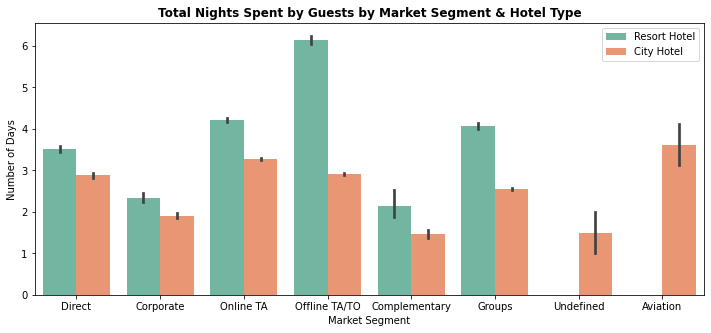

In [26]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] 
sns.barplot(x = "market_segment", y = "total_stay", data = df, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

#### 1.For City hotel, most of guests prefer to stay between 1-4 nights.
#### 2.For Resort hotel, most of the guests prefer to stay more than 3 nights. It is obvious that when guests go to resort hotels, they prefer to stay for longer days.
#### 3.Guests from Aviation Segment do not seem to be staying at the Resort hotels

### 14. How does the Price Per Night (ADR) Vary Over the Year by Hotel Type

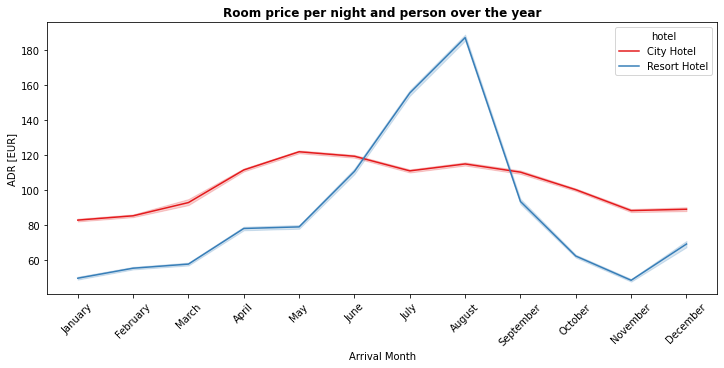

In [27]:
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

#### 1.For Resort Hotel, the price per night (ADR) is more expensive during July, August & September
#### 2.For City Hotel, the price per night (ADR) is slightly more during March, April & May

### 15. What is the effect of repeated guest on Cancellations

In [28]:
pd.crosstab(df['is_repeated_guest'],df['is_canceled'],normalize=True)

is_canceled,0,1
is_repeated_guest,,
0,0.602295,0.365793
1,0.027289,0.004624


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

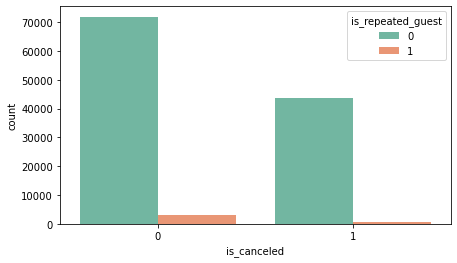

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Set2')

#### 1.From the above graph, we can depict that most of the repeated guests do not cancel their reservations and its obvious.

### 16. Total Number of bookings by deposit type

In [30]:
df['deposit_type'].value_counts(normalize = True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

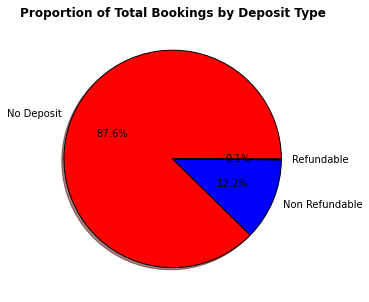

In [31]:
proportion = df['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
cols = ['red','blue','yellow']
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},colors =cols)
plt.show()

#### 1.Around 87.6% bookings are booked without deposit
#### 2.Around 12.2% bookings are booked with Non Refundable Policy
#### 3.Around 0.1% bookings are booked with Refundable Policy

### 17. What is the Effect of Deposit Type on Cancellations

In [32]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.716230
              1              0.283770
Non Refund    1              0.993624
              0              0.006376
Refundable    0              0.777778
              1              0.222222
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

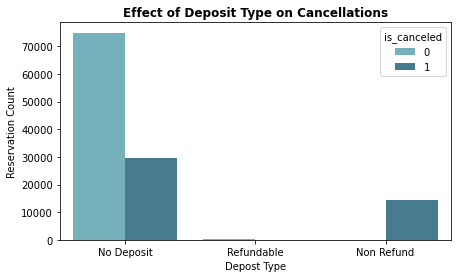

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

#### 1.Around 28% bookings were cancelled by guests with no deposit, followed by 22% bookings were cancelled which are with Refundable policy 
#### 2.So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations

### 18. What is the Effect of Meal type on Cancellations

In [34]:
df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.626151
           1              0.373849
FB         1              0.598997
           0              0.401003
HB         0              0.655397
           1              0.344603
SC         0              0.627606
           1              0.372394
Undefined  0              0.755346
           1              0.244654
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

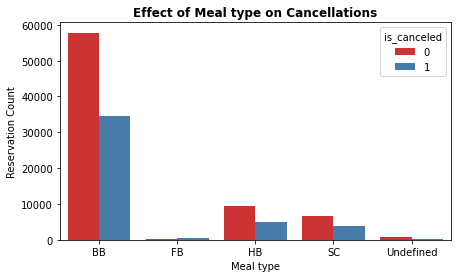

In [35]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'Set1')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

#### 1.From the graph we can depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type.
#### 2.Around 37% bookings of "BB"meal type were cancelled by the guests.

### 19. What is the effect of Required_car_parking_spaces on Cancellations

In [36]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize = True)

required_car_parking_spaces  is_canceled
0                            0              0.605051
                             1              0.394949
1                            0              1.000000
2                            0              1.000000
3                            0              1.000000
8                            0              1.000000
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

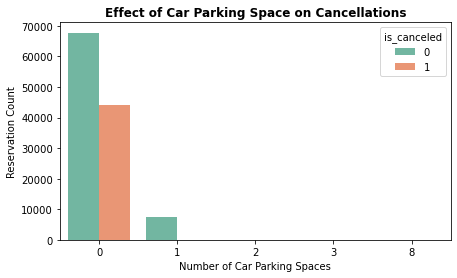

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'required_car_parking_spaces',hue = 'is_canceled',data = df,palette= 'Set2')
plt.title ('Effect of Car Parking Space on Cancellations',weight = 'bold')
plt.xlabel("Number of Car Parking Spaces")
plt.ylabel('Reservation Count')

#### 1.Around 40% bookings were cancelled by guests who didnt opt for Car parking at the time of booking

### 20. What is the Effect of Booking Changes (Modifications) on Cancellations

In [38]:
df.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:6]

booking_changes  is_canceled
0                0              0.591458
                 1              0.408542
1                0              0.857728
                 1              0.142272
2                0              0.798686
                 1              0.201314
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

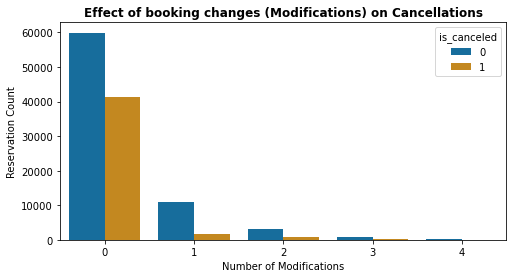

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

#### 1.Around 40% of bookings were cancelled by the guests when no modifications done
#### 2.Around 14% of bookings were cancelled by the guests when one modificationsification was done

# ----------------------------------------------------------------------------------------------------------

In [40]:
df = pd.read_csv('Bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Analysis We will Analyze Below:
#### 1.Exploring Numerical Features
#### 2.Exploring Categorical Features
#### 3.Handling Missing Values in the data set
#### 4.Encoding Categorical Variables
#### 5.Relationship between independent and dependent feature (Correlation Heat map)

### 1. Exploring Numerical Features

In [41]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  20


In [42]:
df[num_feature]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


### 2. Exploring Categorical Features

In [43]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [44]:
df[cat_feature][:5]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


### 3. Handling Missing/Null Values in the data set

In [45]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [46]:
### Check % of Missing Values in the Data set
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


#### 1.From the above Analysis, it shows percentage of missing values in feature.
#### 2.The "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.
#### 3.The "Agent" feature has 13.69% missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.
#### 4.The "Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).
#### 5.The "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [47]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [48]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [49]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [50]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

#### All missing values in the data set are handled succcessfully.

In [51]:
df1 = df.copy()

### 4. Feature Encoding (Encoding Categorical Variables)

In [52]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [53]:
df1[cat_feature][:5]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [54]:
###Let us check how many unique (Distinct) labels exists in each categorical features
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


In [55]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [56]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [57]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

In [58]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,122
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,123


In [59]:
df1.shape

(119390, 31)

### 5. Relationship between independent and dependent feature (Correlation Heat map)

In [60]:
df1.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
reservation_status_date          -0.162135
booking_changes                  -0.144381
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
agent                            -0.046529
babies                           -0.032491
meal                             -0.015693
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
adults     

<AxesSubplot:>

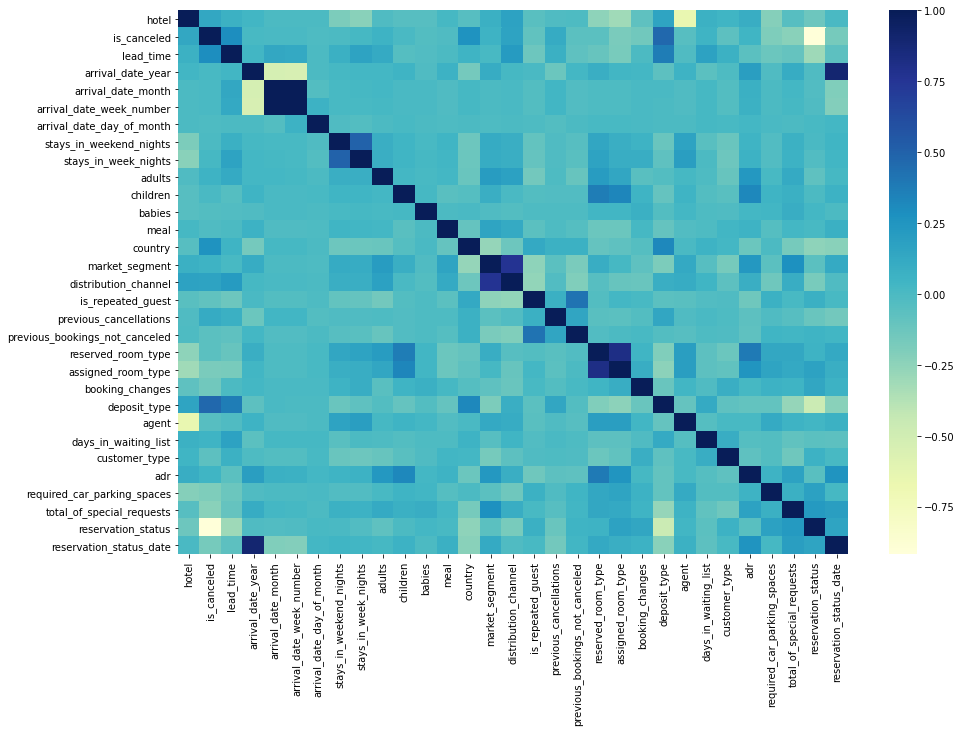

In [61]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), cmap="YlGnBu")

#### 1.reservation_status seems to be most impactful feature and because of its negative correlation with the is_canceled feature it can cause a wrong prediction or overfitting and there is chance of data leakage.Hence I will drop this feature.
#### 2.I will not use arrival_date_week_number, arrival_date_month, arrival_date_year,stays_in_week_nights, stays_in_weekend_nights since their importances are really low while predicting cancellations.
#### 3.reservation_status_date is date type data and it could not convert another type, this feature can also be dropped

In [62]:
df1.drop(columns = ['reservation_status','arrival_date_week_number','arrival_date_month','arrival_date_year','stays_in_week_nights','stays_in_weekend_nights','reservation_status_date'],inplace = True)

In [86]:
df2 = df1.copy()
df2

,hotel,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,1,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.00,0,0
1,0,0,737,1,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.00,0,0
2,0,0,7,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.00,0,0
3,0,0,13,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.00,0,0
4,0,0,14,1,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,30,2,0.0,0,0,15,5,3,0,0,0,0,0,0,0,394.0,0,2,96.14,0,0
119386,1,0,102,31,3,0.0,0,0,56,6,3,0,0,0,4,4,0,0,9.0,0,2,225.43,0,2
119387,1,0,34,31,2,0.0,0,0,43,6,3,0,0,0,3,3,0,0,9.0,0,2,157.71,0,4
119388,1,0,109,31,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,89.0,0,2,104.40,0,0


In [64]:
df2.shape

(119390, 24)

## Model Building

In [65]:
X = df2.drop(["is_canceled"],axis=1)
y = df2["is_canceled"]

In [66]:
#Train and test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

In [67]:
X_train.shape

(83573, 23)

In [68]:
X_test.shape

(35817, 23)

In [69]:
y_train.shape

(83573,)

In [70]:
y_test.shape

(35817,)

In [71]:
#Checking if train and test data of target feature is equally distributed
y_train.value_counts(normalize=True)

0    0.629581
1    0.370419
Name: is_canceled, dtype: float64

In [72]:
y_test.value_counts(normalize=True)

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

In [73]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [74]:
log_reg.score(X_train,y_train)

0.7643497301760138

In [75]:
log_reg.score(X_test,y_test)

0.7621241309992461

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
dt_model.score(X_train,y_train)

0.9963265647996362

In [78]:
dt_model.score(X_test,y_test)

0.8421699193120585

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [80]:
rf_model.score(X_train,y_train)

0.9963145992126644

In [81]:
rf_model.score(X_test,y_test)

0.8846637071781557

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)

[17:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
xgb.score(X_train,y_train)

0.89192681847008

In [84]:
xgb.score(X_test,y_test)

0.8726303152134461